In [1]:
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.utils.data as Data
import torch
import matplotlib.pyplot as plt

In [2]:
# 手写数字训练数据集
mnist = np.load("../../../../Other/datasets/NumPy/mnist.npz")
X_train, y_train, X_val, y_val = torch.unsqueeze(torch.tensor(mnist['x_train']), 1).to(dtype=torch.float32), \
                                   torch.tensor(mnist['y_train']).to(dtype=torch.long), \
                                   torch.unsqueeze(torch.tensor(mnist['x_test']), 1).to(dtype=torch.float32), \
                                   torch.tensor(mnist['y_test']).to(dtype=torch.long)
X_train, X_val = X_train / 255.0, X_val / 255.0

In [3]:
batch_size = 200
train_data = Data.TensorDataset(X_train, y_train)
train_loader = Data.DataLoader(dataset=train_data,
                               batch_size=batch_size,
                               shuffle=True)

val_data = Data.TensorDataset(X_val, y_val)
val_loader = Data.DataLoader(dataset=val_data, batch_size=batch_size)

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.featrues = nn.Sequential(  # 内部实现了forward函数;各模块顺序执行
            nn.Conv2d(1, 6, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(400, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10),  # 10分类问题
        )

    def forward(self, x):
        x = self.featrues(x)
        x = x.reshape(x.size()[0], -1)
        x = self.classifier(x)
        return x

In [4]:
learning_rate = 0.01
criteon = nn.CrossEntropyLoss()  # 定义损失函数为交叉熵
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = LeNet()
lenet = net.to(device)  # 模型设备转移必须在优化器定义前执行

# 多参数组的SGD优化器
optimizer = optim.SGD([dict(params=net.featrues.parameters(), momentum=0.9),
                       dict(params=net.classifier.parameters(),
                            momentum=0.95,  # 动量参数\alpha;默认momentum=0
                            nesterov=True)],  # 是否启用Nesterov动量
                      lr=learning_rate)  # 学习率

In [5]:
from J_Template.assembly.torch_模型训练与评估.train_evaluate import Train_Evaluate

t_and_v = Train_Evaluate(model=lenet, optimizer=optimizer, criterion=criteon, epochs=20)

In [6]:
metric_reslut = t_and_v.train_eval(train_loader=train_loader, valid_loader=val_loader)
print(metric_reslut)  # 每一轮验证数据集的损失值

Train Epoch: 0  [0    /60000 (0  %)]	Loss: 2.307474
Train Epoch: 0  [4000 /60000 (7  %)]	Loss: 2.296471
Train Epoch: 0  [8000 /60000 (13 %)]	Loss: 2.275253
Train Epoch: 0  [12000/60000 (20 %)]	Loss: 2.243181
Train Epoch: 0  [16000/60000 (27 %)]	Loss: 2.043563
Train Epoch: 0  [20000/60000 (33 %)]	Loss: 0.917067
Train Epoch: 0  [24000/60000 (40 %)]	Loss: 0.581102
Train Epoch: 0  [28000/60000 (47 %)]	Loss: 0.486732
Train Epoch: 0  [32000/60000 (53 %)]	Loss: 0.447371
Train Epoch: 0  [36000/60000 (60 %)]	Loss: 0.339160
Train Epoch: 0  [40000/60000 (67 %)]	Loss: 0.361119
Train Epoch: 0  [44000/60000 (73 %)]	Loss: 0.377090
Train Epoch: 0  [48000/60000 (80 %)]	Loss: 0.249174
Train Epoch: 0  [52000/60000 (87 %)]	Loss: 0.188845
Train Epoch: 0  [56000/60000 (93 %)]	Loss: 0.139844
Train Epoch: 0  [60000/60000 (100%)]	Loss: 0.170154
----------------------------------------------------------------------------------------------------
Train Epoch: 1  [0    /60000 (0  %)]	Loss: 0.143775
Train Epoch: 1 

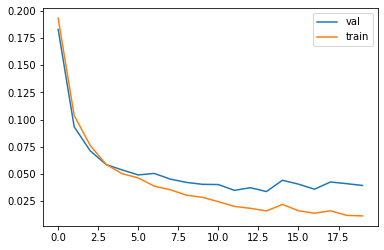

In [7]:
plt.plot(metric_reslut['val_loss'], label="val")
plt.plot(metric_reslut['train_loss'], label='train')
plt.legend()
plt.show()
